<a href="https://colab.research.google.com/github/khushaboo167/Bank_Locker_Availability/blob/main/Copy_of_image_encryption_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
import time
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img2.webp to img2.webp


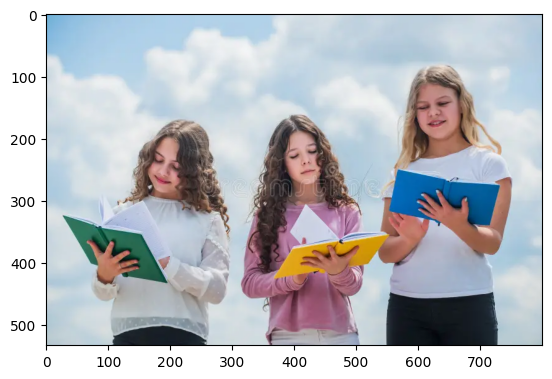

In [ ]:
img = np.array(Image.open("img2.webp"))
plt.imshow(img)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Please upload your image file now.


Saving img2.webp to img2 (1).webp
Image 'img2 (1).webp' successfully uploaded.
--2025-12-10 07:22:26--  https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/YapaLab/yolo-face/releases/download/v0.0.0/yolov8n-face.pt [following]
--2025-12-10 07:22:26--  https://github.com/YapaLab/yolo-face/releases/download/v0.0.0/yolov8n-face.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/592261808/fef886fa-7bce-42bc-8056-4c0ee291b0eb?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-10T08%3A20%3A46Z&rscd=attachment%3B+filename%3Dyolov8n-face.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a

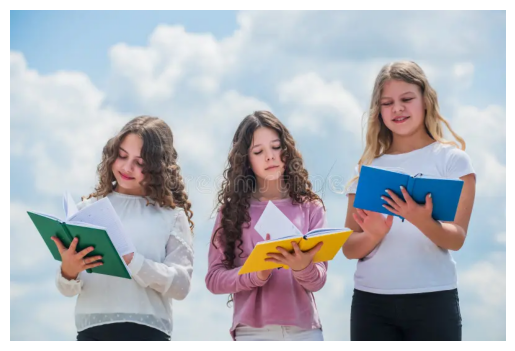

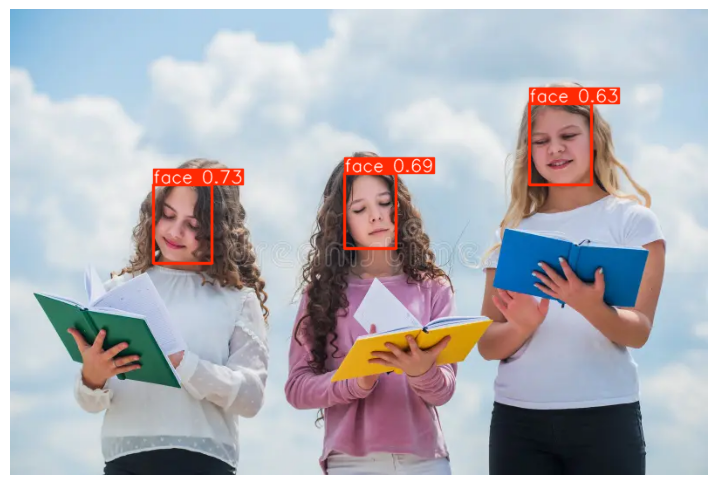

Detected face boxes:
[[     164.29      201.16      231.31      291.12]
 [     383.83         188      442.22      274.86]
 [      595.6      108.59      666.68      201.34]]


In [ ]:
!pip install ultralytics
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

# Upload image
print("Please upload your image file now.")
uploaded = files.upload()

IMAGE_FILENAME = next(iter(uploaded))
print(f"Image '{IMAGE_FILENAME}' successfully uploaded.")

img_pil = Image.open(IMAGE_FILENAME).convert("RGB")
img = np.array(img_pil)
plt.imshow(img)
plt.axis("off")

# ✅ DOWNLOAD YOLOv8 Face Model (Fix for FileNotFoundError)
!wget https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt

# Load YOLO Face Model

model = YOLO("yolov8n-face.pt")

print("Running YOLO face detection...")
results = model(img, conf=0.40)

# Visualize detections
result_img = results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(result_img)
plt.axis("off")
plt.show()

# Extract detected face boxes
faces = results[0].boxes.xyxy.cpu().numpy()
print("Detected face boxes:")
print(faces)

Please upload your image file now.


Saving img2.webp to img2 (2).webp
Image 'img2 (2).webp' successfully uploaded.


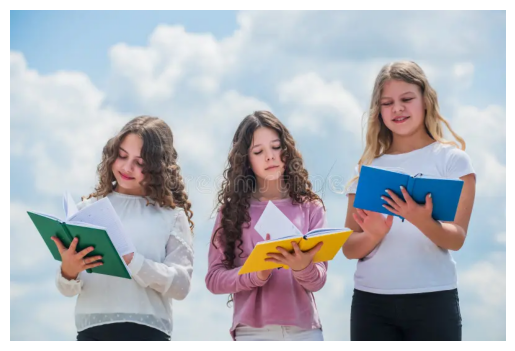

--2025-12-10 07:22:57--  https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/YapaLab/yolo-face/releases/download/v0.0.0/yolov8n-face.pt [following]
--2025-12-10 07:22:57--  https://github.com/YapaLab/yolo-face/releases/download/v0.0.0/yolov8n-face.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/592261808/fef886fa-7bce-42bc-8056-4c0ee291b0eb?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-10T08%3A20%3A46Z&rscd=attachment%3B+filename%3Dyolov8n-face.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-10T07%3A20%3A05Z&ske=2025-12-10T08

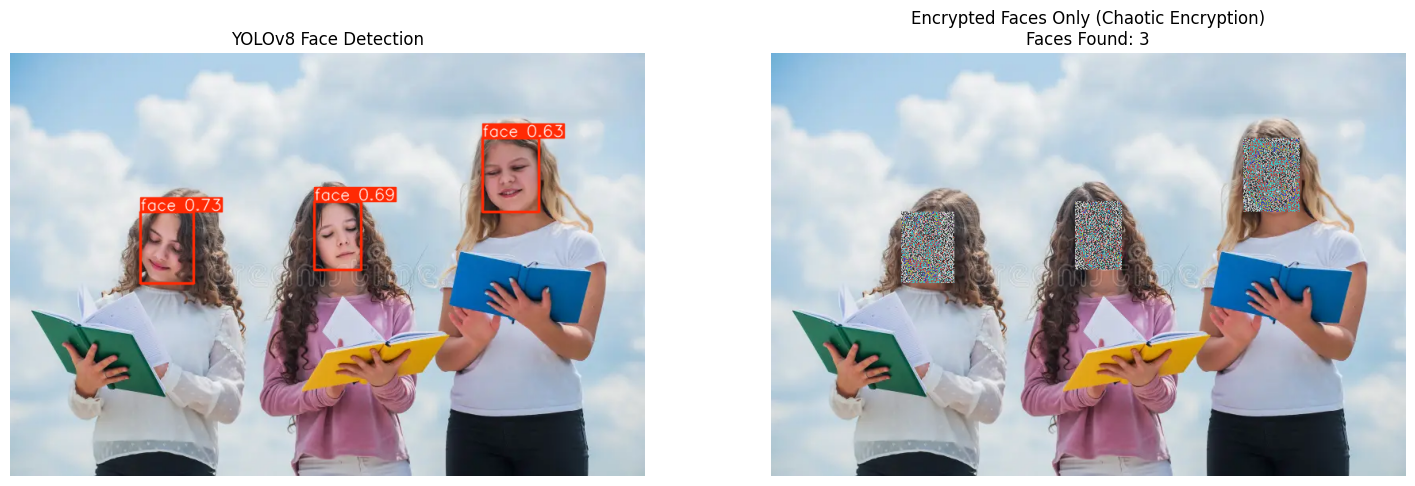

In [ ]:
# !pip install ultralytics

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from google.colab import files
import torch
from torchvision.ops import nms


# 1. Chaotic Encryption Function (Same as your original code)
def chaotic_encrypt_face(face_region, r1=3.99, r2=3.99, x0=0.1, y0=0.2):
    H, W, C = face_region.shape
    if H == 0 or W == 0:
        return face_region.astype(np.uint8)

    encrypted_region = face_region.copy().astype(np.float32)

    # Logistic map transient
    x, y = x0, y0
    for _ in range(500):
        x = r1 * x * (1 - x)
        y = r2 * y * (1 - y)

    chaotic_seq = np.zeros((H * W, 2))
    for i in range(H * W):
        x = r1 * x * (1 - x)
        y = r2 * y * (1 - y)
        chaotic_seq[i] = [x, y]

    key = (chaotic_seq[:, 0] * 256).astype(np.uint8).reshape(H, W)

    # XOR substitution channel-wise
    for c in range(C):
        encrypted_region[:, :, c] = np.bitwise_xor(
            face_region[:, :, c].astype(np.uint8), key
        )

    return encrypted_region.astype(np.uint8)



# 2. Upload Image
print("Please upload your image file now.")
uploaded = files.upload()

IMAGE_FILENAME = next(iter(uploaded))
print(f"Image '{IMAGE_FILENAME}' successfully uploaded.")

img_pil = Image.open(IMAGE_FILENAME).convert("RGB")
img = np.array(img_pil)
img_encrypted = img.copy()

plt.imshow(img)
plt.axis("off")
plt.show()


# 3. Download YOLOv8 Face Model
!wget https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt -O yolov8n-face.pt


# 4. Run YOLO Face Detection
model = YOLO("yolov8n-face.pt")

print("Running YOLO face detection...")
results = model(img, conf=0.40)

# Extract face boxes
boxes = results[0].boxes.xyxy.cpu().numpy()
confidences = results[0].boxes.conf.cpu().numpy()



# 5. Optional NMS to avoid overlapping faces
if len(boxes) > 0:
    keep = nms(
        torch.tensor(boxes, dtype=torch.float),
        torch.tensor(confidences, dtype=torch.float),
        iou_threshold=0.3
    )
    final_face_boxes = torch.tensor(boxes)[keep].numpy().astype(int)
else:
    final_face_boxes = []


# 6. Encrypt ONLY Detected Face Regions
ENCRYPTED_COUNT = 0

for (x1, y1, x2, y2) in final_face_boxes:
    face_region = img_encrypted[y1:y2, x1:x2]

    if face_region.size > 0:
        encrypted_face = chaotic_encrypt_face(face_region)
        img_encrypted[y1:y2, x1:x2] = encrypted_face
        ENCRYPTED_COUNT += 1


# 7. Display Results
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(results[0].plot())
plt.title("YOLOv8 Face Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_encrypted)
plt.title(f"Encrypted Faces Only (Chaotic Encryption)\nFaces Found: {ENCRYPTED_COUNT}")
plt.axis("off")

plt.show()

In [ ]:


# # !pip install ultralytics pywavelets

# # import numpy as np
# # from PIL import Image
# # import matplotlib.pyplot as plt
# # import cv2
# # from ultralytics import YOLO
# # from google.colab import files
# import pywt
# import torch
# from torchvision.ops import nms
# import sys


# #   DWT-TPE ENCRYPTION

# def dwt_tpe_encrypt_background(image, wavelet='haar', level=1):
#     """
#     Encrypts ONLY the background using DWT + permutation + XOR substitution.
#     Faces will be preserved separately.
#     """
#     H, W, C = image.shape
#     encrypted_channels = []

#     # Key stream (same for all channels)
#     np.random.seed(42)
#     key_stream = np.random.randint(0, 256, size=(H*W*C), dtype=np.uint8)

#     for c in range(C):
#         channel = image[:, :, c].astype(np.float32)

#         # ---- DWT ----
#         coeffs = pywt.wavedec2(channel, wavelet, level=level)
#         cA, details = coeffs[0], coeffs[1:]

#         encrypted_details = []
#         key_idx = 0

#         for (cH, cV, cD) in details:

#             # Flatten + Permute
#             cH_f = cH.flatten(); np.random.shuffle(cH_f)
#             cV_f = cV.flatten(); np.random.shuffle(cV_f)
#             cD_f = cD.flatten(); np.random.shuffle(cD_f)

#             # XOR Substitution
#             size = cH.size
#             k = key_stream[key_idx:key_idx+3*size].astype(np.int32)
#             key_idx += 3*size

#             cH_enc = np.bitwise_xor(cH_f.astype(np.int32), k[:size]).reshape(cH.shape)
#             cV_enc = np.bitwise_xor(cV_f.astype(np.int32), k[size:2*size]).reshape(cV.shape)
#             cD_enc = np.bitwise_xor(cD_f.astype(np.int32), k[2*size:3*size]).reshape(cD.shape)

#             encrypted_details.append((cH_enc, cV_enc, cD_enc))

#         encrypted_coeffs = [cA] + encrypted_details
#         encrypted_channel = pywt.waverec2(encrypted_coeffs, wavelet)
#         encrypted_channel = np.clip(encrypted_channel, 0, 255).astype(np.uint8)

#         encrypted_channels.append(encrypted_channel)

#     return np.stack(encrypted_channels, axis=2)



# #   UPLOAD IMAGE

# print("Upload your image:")
# uploaded = files.upload()

# if not uploaded:
#     print("No file uploaded.")
#     sys.exit(1)

# IMAGE_FILENAME = next(iter(uploaded))
# print(f"Uploaded: {IMAGE_FILENAME}")

# img_pil = Image.open(IMAGE_FILENAME).convert("RGB")
# img = np.array(img_pil)
# img_original = img.copy()



# #   YOLO FACE DETECTOR

# # Download YOLOv8n-face (FIXES FileNotFoundError)
# !wget -q https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt

# model = YOLO("yolov8n-face.pt")

# print("Running YOLO Face Detection…")
# results = model(img, conf=0.40)[0]   # returns first result

# detected_boxes = results.boxes.xyxy.cpu().numpy()
# scores = results.boxes.conf.cpu().numpy()

# #   APPLY NMS ON FACE BOXES

# if len(detected_boxes) > 0:
#     keep = nms(torch.tensor(detected_boxes, dtype=torch.float32),
#                torch.tensor(scores, dtype=torch.float32),
#                iou_threshold=0.20)
#     final_face_boxes = detected_boxes[keep.numpy()].astype(int)
# else:
#     final_face_boxes = []


# #   CREATE FACE MASK

# face_mask = np.zeros(img.shape[:2], dtype=bool)

# for x1, y1, x2, y2 in final_face_boxes:
#     face_mask[y1:y2, x1:x2] = True



# #   DWT-TPE BACKGROUND ENCRYPTION

# print("Encrypting background with DWT-TPE…")
# dwt_tpe_output = dwt_tpe_encrypt_background(img_original.copy())


# #   COMBINE RESULTS

# final_img = np.zeros_like(img)

# for c in range(3):

#     final_img[:,:,c][face_mask] = img_original[:,:,c][face_mask]    # ORIGINAL FACES
#     final_img[:,:,c][~face_mask] = dwt_tpe_output[:,:,c][~face_mask]  # ENCRYPT BACKGROUND



# #   DISPLAY RESULT

# plt.figure(figsize=(18,9))

# plt.subplot(1,2,1)
# plt.imshow(results.plot())
# plt.title("YOLOv8-Face Detection")
# plt.axis("off")

# plt.subplot(1,2,2)
# plt.imshow(final_img)
# plt.title(f"Final Output: {len(final_face_boxes)} Faces Kept, Background Encrypted")
# plt.axis("off")

# plt.show()

Upload your image:


Saving img2.webp to img2 (3).webp
Detecting faces...

0: 448x640 3 faces, 219.0ms
Speed: 4.6ms preprocess, 219.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


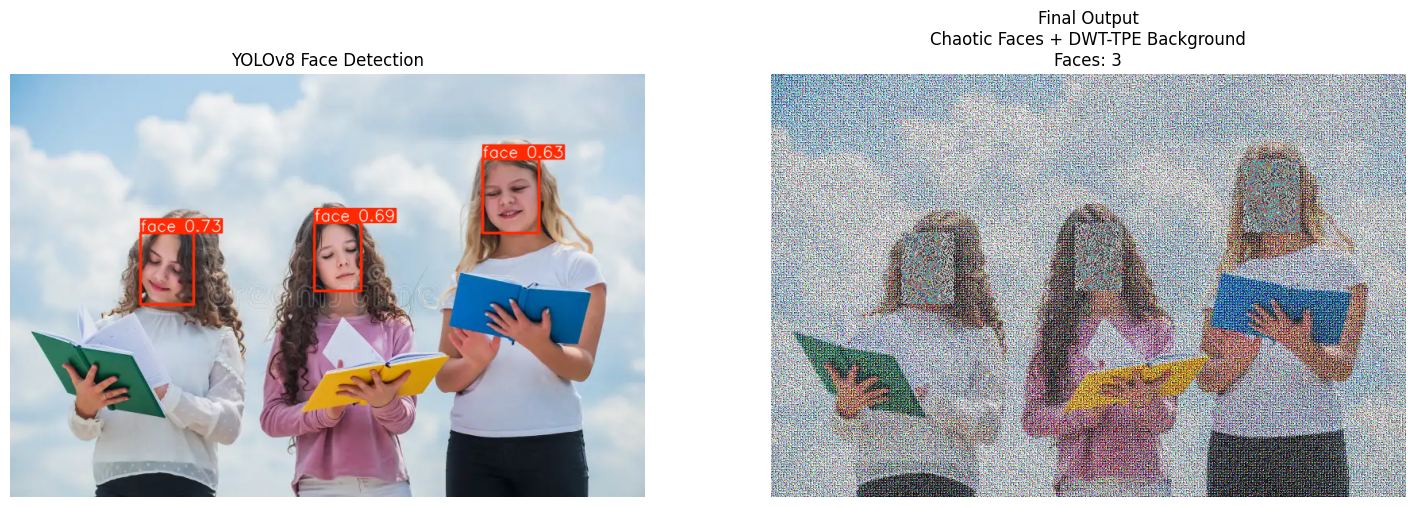

In [ ]:

# !pip install ultralytics pywavelets --quiet

# import numpy as np
# from PIL import Image
# import matplotlib.pyplot as plt
# import cv2
# from ultralytics import YOLO
# from google.colab import files
import pywt
# import torch
# from torchvision.ops import nms
# import sys

# 1. CHAOTIC FACE ENCRYPTION
def chaotic_encrypt_face(face_region, r1=3.99, r2=3.99, x0=0.1, y0=0.2):
    H, W, C = face_region.shape
    if H == 0 or W == 0:
        return face_region.astype(np.uint8)

    encrypted_region = face_region.copy().astype(np.float32)

    # Logistic map initialization
    x, y = x0, y0
    for _ in range(500):
        x = r1 * x * (1 - x)
        y = r2 * y * (1 - y)

    chaotic_seq = np.zeros((H * W, 2))
    for i in range(H * W):
        x = r1 * x * (1 - x)
        y = r2 * y * (1 - y)
        chaotic_seq[i] = [x, y]

    key = (chaotic_seq[:, 0] * 256).astype(np.uint8).reshape(H, W)

    # XOR substitution
    for c in range(C):
        encrypted_region[:,:,c] = np.bitwise_xor(
            face_region[:,:,c].astype(np.uint8), key
        )

    return encrypted_region.astype(np.uint8)


# 2. DWT-TPE BACKGROUND ENCRYPTION
def dwt_tpe_encrypt_background(image, wavelet='haar', level=1):
    H, W, C = image.shape
    encrypted_channels = []

    np.random.seed(42)
    key_stream = np.random.randint(0, 256, size=(H*W*C), dtype=np.uint8)

    for c in range(C):

        channel = image[:,:,c].astype(np.float32)

        coeffs = pywt.wavedec2(channel, wavelet, level=level)
        cA, details = coeffs[0], coeffs[1:]
        encrypted_details = []
        key_idx = 0

        for (cH, cV, cD) in details:

            cH_f = cH.flatten(); np.random.shuffle(cH_f)
            cV_f = cV.flatten(); np.random.shuffle(cV_f)
            cD_f = cD.flatten(); np.random.shuffle(cD_f)

            size = cH.size
            key = key_stream[key_idx:key_idx+3*size].astype(np.int32)
            key_idx += 3*size

            cH_enc = np.bitwise_xor(cH_f.astype(np.int32), key[:size]).reshape(cH.shape)
            cV_enc = np.bitwise_xor(cV_f.astype(np.int32), key[size:2*size]).reshape(cV.shape)
            cD_enc = np.bitwise_xor(cD_f.astype(np.int32), key[2*size:3*size]).reshape(cD.shape)

            encrypted_details.append((cH_enc, cV_enc, cD_enc))

        encrypted_coeffs = [cA] + encrypted_details
        encrypted_channel = pywt.waverec2(encrypted_coeffs, wavelet)
        encrypted_channel = np.clip(encrypted_channel, 0, 255).astype(np.uint8)
        encrypted_channels.append(encrypted_channel)

    return np.stack(encrypted_channels, axis=2)


# 3. UPLOAD IMAGE
print("Upload your image:")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded.")
    sys.exit(1)

IMAGE_FILENAME = next(iter(uploaded))
img_pil = Image.open(IMAGE_FILENAME).convert("RGB")
img = np.array(img_pil)
img_original = img.copy()
img_final = img.copy()


# 4. YOLO FACE DETECTOR
!wget -q https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt

model = YOLO("yolov8n-face.pt")

print("Detecting faces...")
results = model(img, conf=0.40)[0]

boxes = results.boxes.xyxy.cpu().numpy()
scores = results.boxes.conf.cpu().numpy()


# 5. APPLY NMS
if len(boxes) > 0:
    keep = nms(torch.tensor(boxes, dtype=torch.float32),
               torch.tensor(scores, dtype=torch.float32),
               iou_threshold=0.20)
    final_face_boxes = boxes[keep.numpy()].astype(int)
else:
    final_face_boxes = []


# 6. ENCRYPT FACES WITH CHAOTIC MAP
FACE_COUNT = 0

for (x1, y1, x2, y2) in final_face_boxes:
    face = img_final[y1:y2, x1:x2]

    if face.size > 0:
        encrypted_face = chaotic_encrypt_face(face)
        img_final[y1:y2, x1:x2] = encrypted_face
        FACE_COUNT += 1


# 7. DWT-TPE BACKGROUND ENCRYPTION
background_encrypted = dwt_tpe_encrypt_background(img_original.copy())

# Create mask
mask = np.zeros(img.shape[:2], dtype=bool)
for (x1, y1, x2, y2) in final_face_boxes:
    mask[y1:y2, x1:x2] = True

# Combine face + background
final_output = np.zeros_like(img)

for c in range(3):
    final_output[:,:,c][mask] = img_final[:,:,c][mask]      # Chaotic encrypted faces
    final_output[:,:,c][~mask] = background_encrypted[:,:,c][~mask]  # TPE encrypted background


# 8. SHOW RESULTS

plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.imshow(results.plot())
plt.axis("off")
plt.title("YOLOv8 Face Detection")

plt.subplot(1, 2, 2)
plt.imshow(final_output)
plt.axis("off")
plt.title(f"Final Output\nChaotic Faces + DWT-TPE Background\nFaces: {FACE_COUNT}")

plt.show()

Please upload your image file now.


Saving img2.webp to img2 (4).webp
Image 'img2 (4).webp' successfully uploaded.

Original Image Shape: (534, 800, 3)
Block Size: 64
Blocks Shape (Rows, Cols, Block_H, Block_W, Channels): (9, 13, 64, 64, 3)
Padded into 9 rows and 13 columns of blocks.


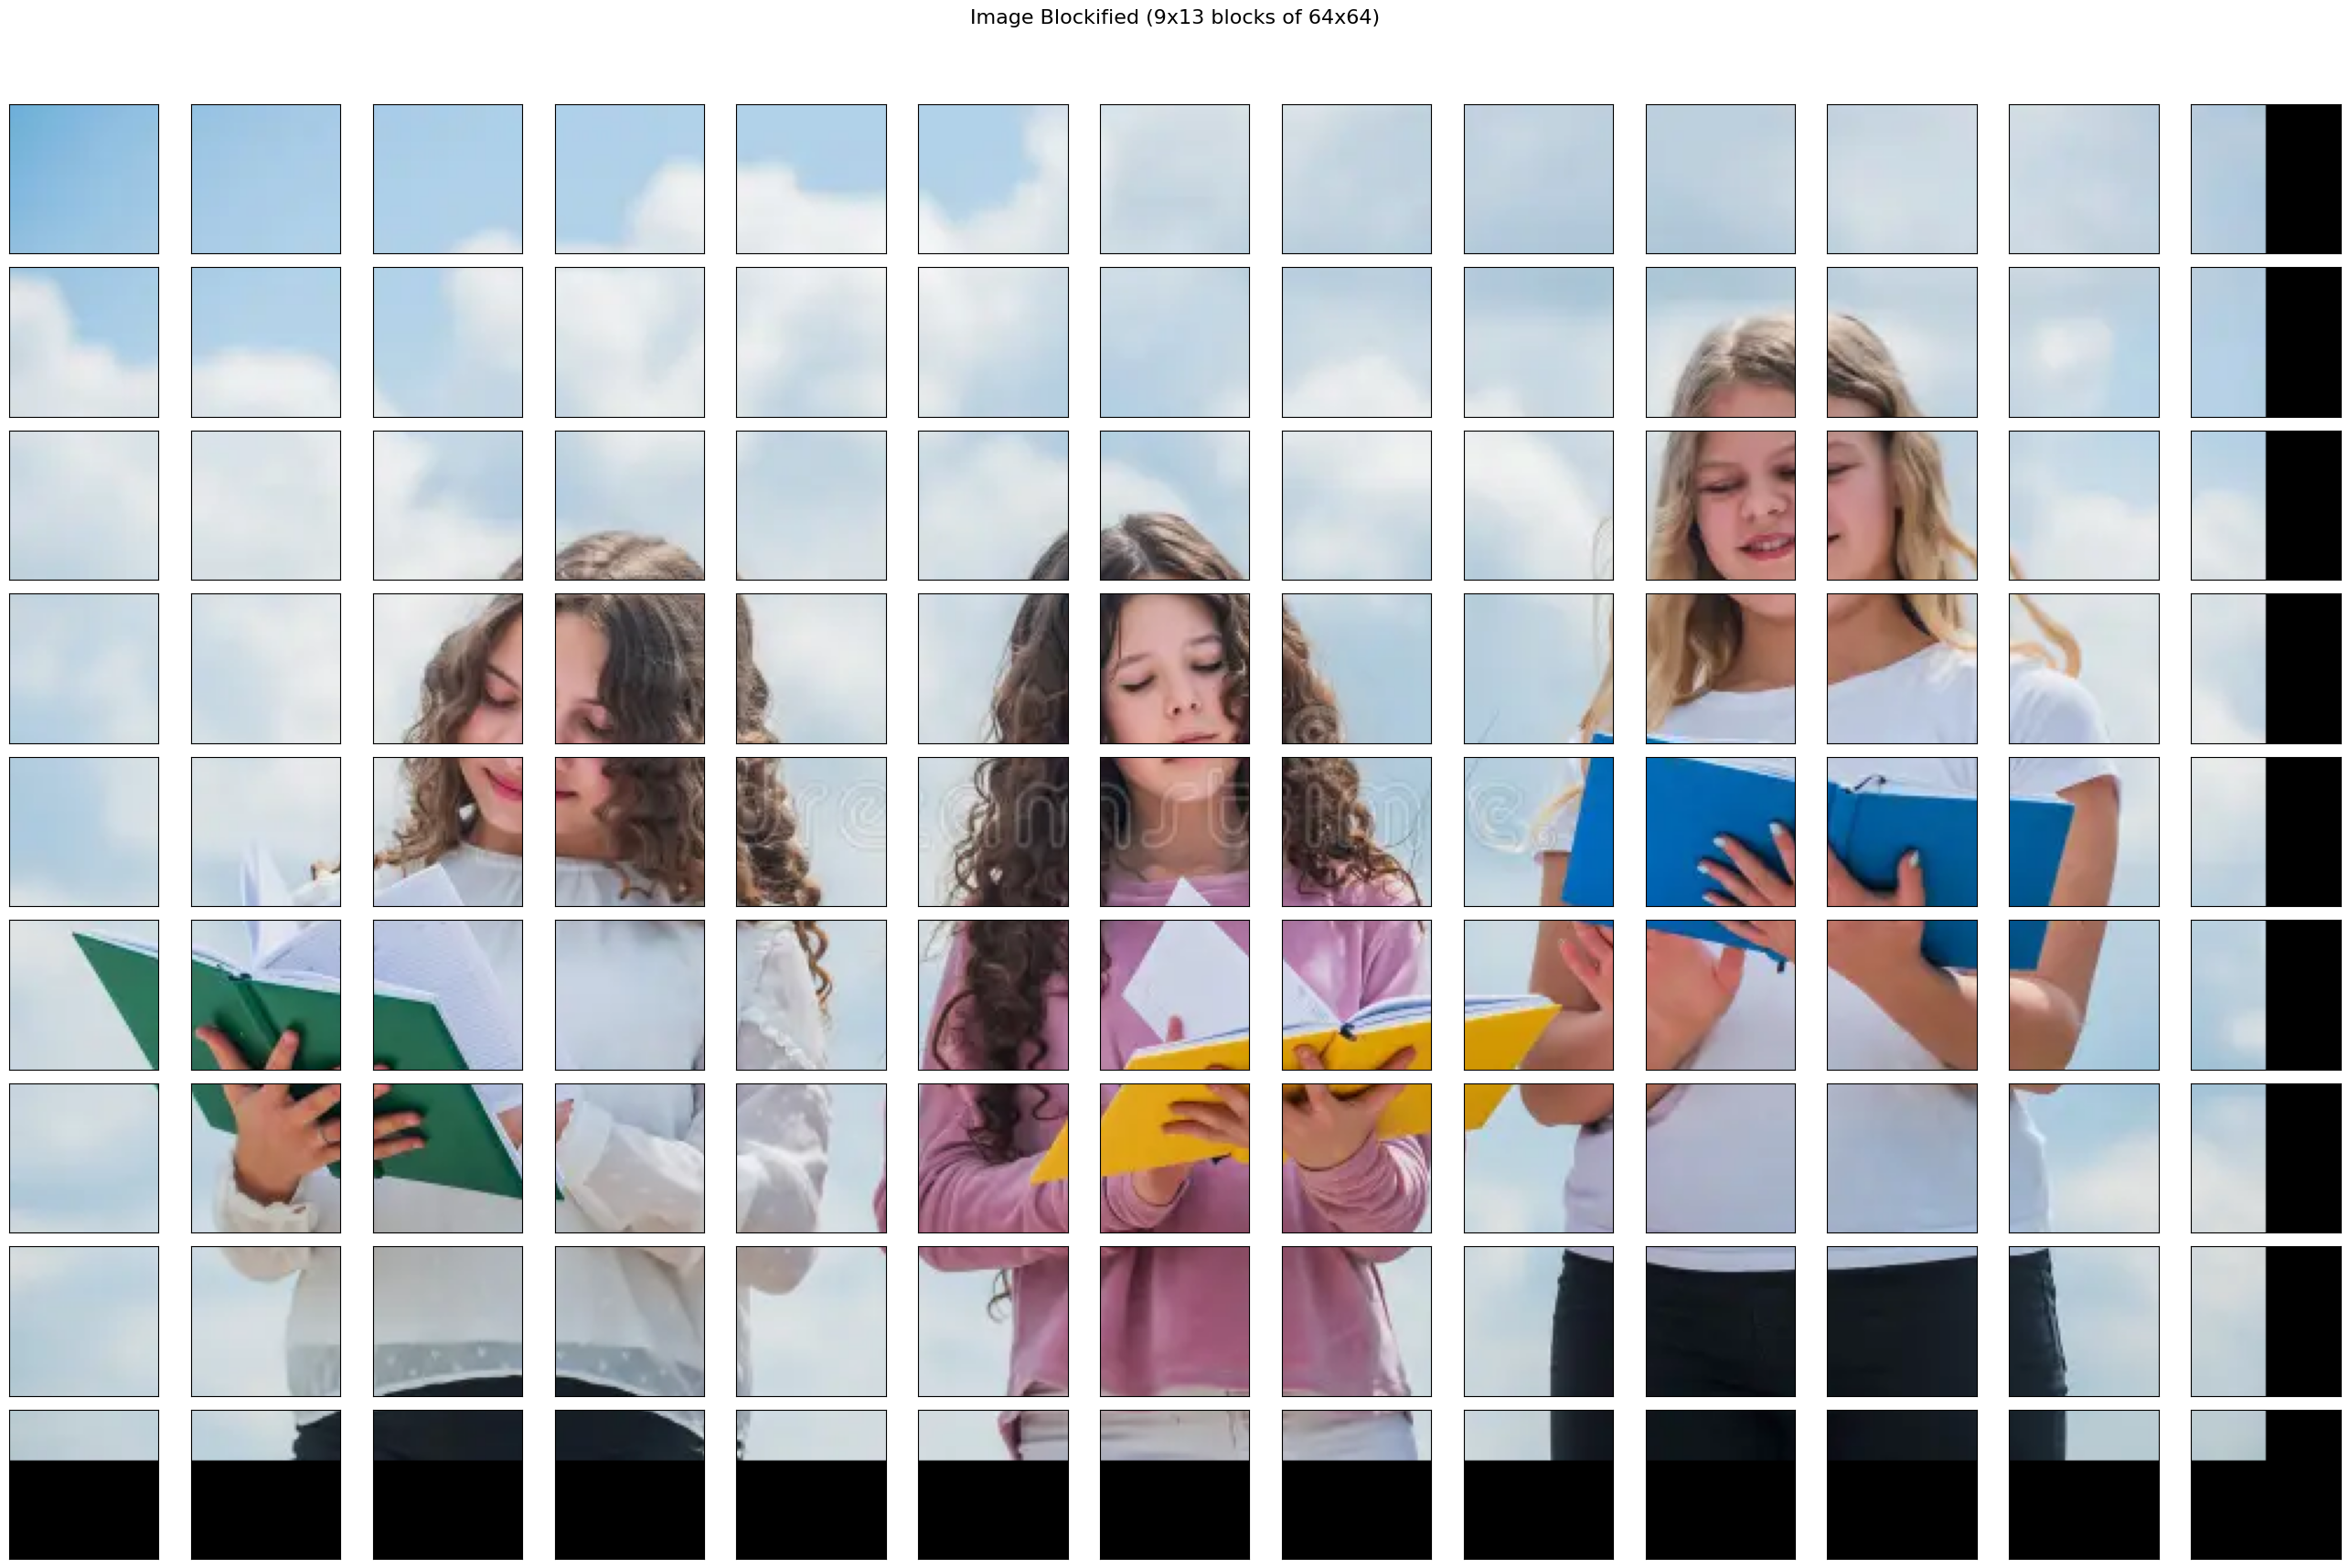

In [ ]:
# blockify
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files # Keep this for Colab environment
import sys # For clean exit

# --- CORRECTED BLOCKIFY FUNCTION ---
def blockify(img, block_size=64, pad_mode='constant', constant_values=0):
    """
    Splits an image of any size into blocks of size block_size x block_size.
    Pads the image if its dimensions are not multiples of block_size.
    """
    # 1. Get current dimensions (H, W, D)
    h, w, d = img.shape

    # 2. Calculate padding needed (pad_h for height/rows, pad_w for width/columns)
    pad_h = (block_size - (h % block_size)) % block_size
    pad_w = (block_size - (w % block_size)) % block_size

    # 3. Define padding shape for numpy.pad: ((top, bottom), (left, right), (depth_top, depth_bottom))
    # We only pad the bottom and right edges here.
    pad_width = ((0, pad_h), (0, pad_w), (0, 0))

    # 4. Apply Padding
    padded_img = np.pad(
        img,
        pad_width,
        mode=pad_mode,
        constant_values=constant_values
    )

    # 5. Recalculate dimensions based on the padded image
    ph, pw, _ = padded_img.shape

    blocks_horizontal = pw // block_size # Number of blocks across the width
    blocks_vertical = ph // block_size   # Number of blocks across the height

    # 6. Slice the padded image into blocks
    blocks = []

    for i in range(blocks_vertical): # Iterate over rows (vertical index)
        row_blocks = []
        for j in range(blocks_horizontal): # Iterate over columns (horizontal index)
            # Row slicing (Height)
            y1 = i * block_size
            y2 = (i + 1) * block_size
            # Column slicing (Width)
            x1 = j * block_size
            x2 = (j + 1) * block_size

            # Slice the block using [row_slice, column_slice]
            row_blocks.append(padded_img[y1:y2, x1:x2])
        blocks.append(row_blocks)

    # Convert the list of lists into a 4D NumPy array
    return np.array(blocks)


# EXECUTION (Uses User Uploaded Image)

#  A. User Image Upload
print("Please upload your image file now.")
try:
    uploaded = files.upload()
except Exception as e:
    print(f"File upload failed. Ensure you are in a Colab environment. Error: {e}")
    sys.exit(1)

if not uploaded:
    print("No file uploaded. Exiting process.")
    sys.exit(1)

IMAGE_FILENAME = next(iter(uploaded))
print(f"Image '{IMAGE_FILENAME}' successfully uploaded.")

#  B. Load and Prepare Image
try:
    # Open the uploaded file and convert to RGB (to ensure 3 channels)
    img_pil = Image.open(IMAGE_FILENAME).convert("RGB")
    img = np.array(img_pil)
except Exception as e:
    print(f"Error loading image: {e}")
    sys.exit(1)


BLOCK_SIZE = 64 # You can change this block size (e.g., 32, 128)

print(f"\nOriginal Image Shape: {img.shape}")
print(f"Block Size: {BLOCK_SIZE}")

#  C. Blockify the image
# The padding will use black (constant_values=0)
blocks = blockify(img, block_size=BLOCK_SIZE, constant_values=0)

rows, cols = blocks.shape[:2]

print(f"Blocks Shape (Rows, Cols, Block_H, Block_W, Channels): {blocks.shape}")
print(f"Padded into {rows} rows and {cols} columns of blocks.")

#  D. Visualization
# We use a large figsize to clearly see the blocks
fig, ax = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

# Flatten the axes array if there's only one row or column
ax = np.array(ax).flatten()

# Draw blocks
for i in range(rows):
    for j in range(cols):
        # Calculate the index in the flattened ax array
        idx = i * cols + j
        current_ax = ax[idx]

        current_ax.imshow(blocks[i, j])
        current_ax.set_xticks([])
        current_ax.set_yticks([])

plt.suptitle(f"Image Blockified ({rows}x{cols} blocks of {BLOCK_SIZE}x{BLOCK_SIZE})", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle

plt.show()

Implement the following tests for the image encryption

NPCR and UACI

Histogram analysis

Correlation Analysis

Chi Square Test

Key Sensitivity

Entropy

Time Cost analysis

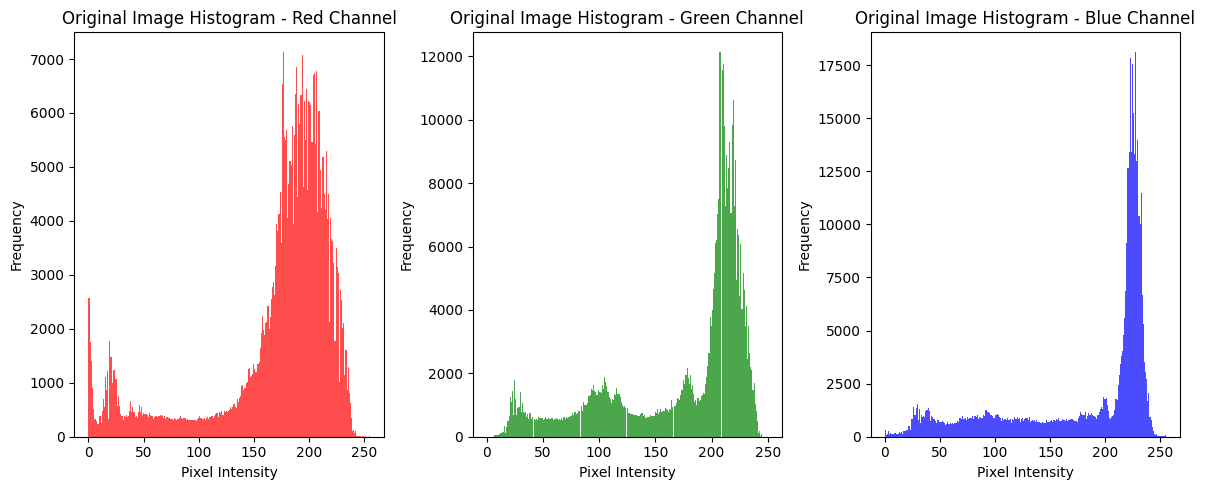

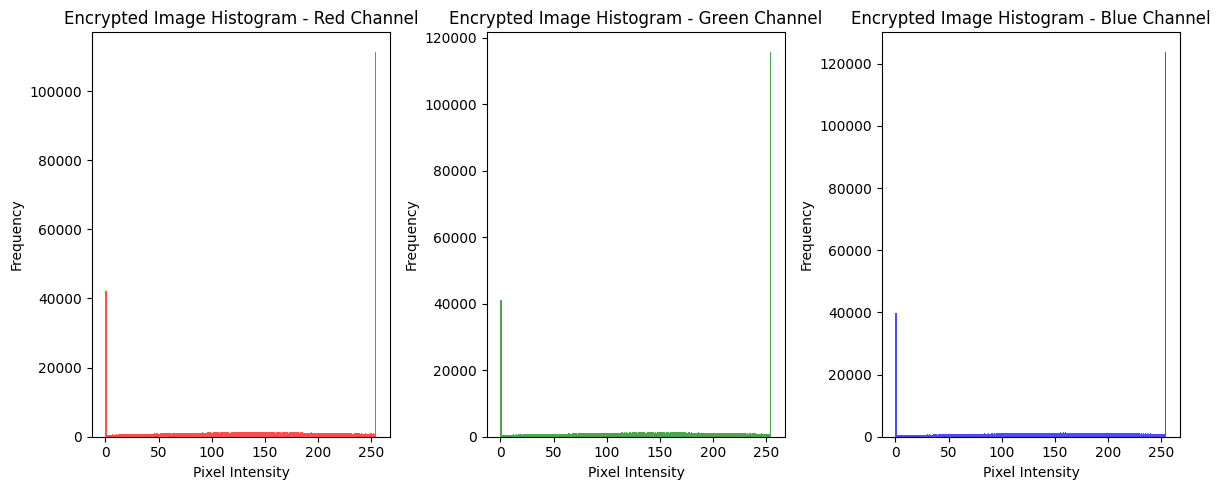

In [ ]:
# ----------------------Histogram analysis-----------------
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(image, title="Histogram"):
    """
    image : RGB image (H × W × 3)
    Plots histogram of R, G, B channels.
    """
    if len(image.shape) == 2:
        # Grayscale case
        plt.figure(figsize=(7,5))
        plt.hist(image.flatten(), bins=256)
        plt.title(title)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()
        return

    # RGB image
    color_labels = ['Red', 'Green', 'Blue']
    colors = ['r', 'g', 'b']

    plt.figure(figsize=(12, 5))

    for i, color in enumerate(colors):
        plt.subplot(1, 3, i+1)
        plt.hist(image[:,:,i].flatten(), bins=256, color=color, alpha=0.7)
        plt.title(f"{title} - {color_labels[i]} Channel")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

plot_histogram(img_original, title="Original Image Histogram")
plot_histogram(final_output, title="Encrypted Image Histogram")


Original Image Correlation:


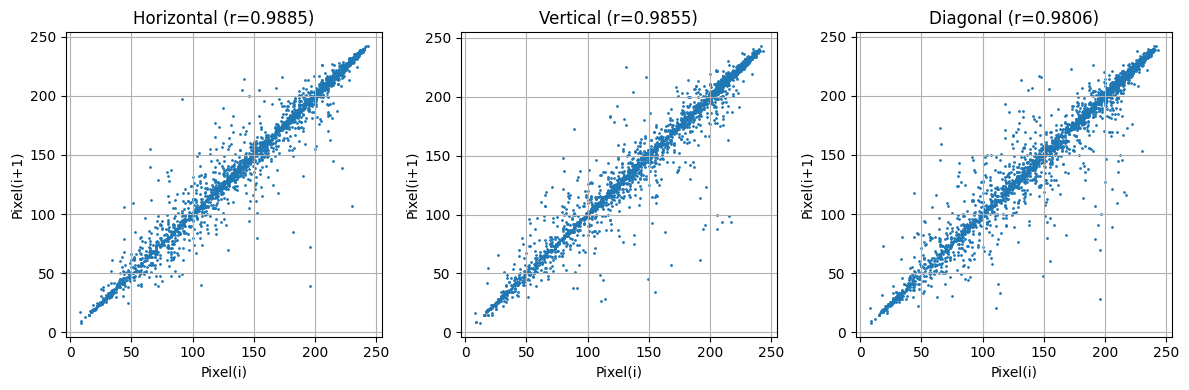

Correlation coefficients -> Horizontal: 0.9885, Vertical: 0.9855, Diagonal: 0.9806

Encrypted Image Correlation:


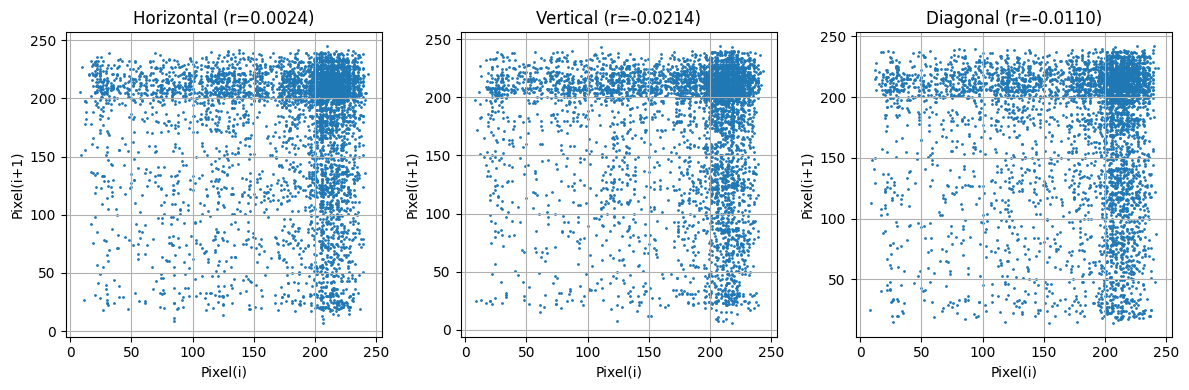

Correlation coefficients -> Horizontal: 0.0024, Vertical: -0.0214, Diagonal: -0.0110

Original Image Chi-Square Test:
Chi-Square Statistic: 788002.963895
p-value: 0.0000000000000000

Encrypted Image Chi-Square Test:
Chi-Square Statistic: 788002.963895
p-value: 0.0000000000000000

Summary:
Original Image: Correlation H=0.9885, V=0.9855, D=0.9806
Encrypted Image: Correlation H=0.0024, V=-0.0214, D=-0.0110


In [ ]:
# ----------------------Correlation Analysis-----------------
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# ---------------------------
# Correlation Analysis
# ---------------------------
def correlation_analysis(img, sample_size=5000, show_plots=True, seed=42):
    """Calculate horizontal, vertical, diagonal correlations."""
    if img.ndim == 3:
        img_gray = np.mean(img, axis=2).astype(np.uint8)
    else:
        img_gray = img.astype(np.uint8)

    h, w = img_gray.shape
    rng = np.random.default_rng(seed)
    ys = rng.integers(0, h - 1, size=sample_size)
    xs = rng.integers(0, w - 1, size=sample_size)

    # Horizontal
    horiz = img_gray[ys, xs].astype(np.float32)
    horiz_next = img_gray[ys, np.minimum(xs + 1, w - 1)].astype(np.float32)

    # Vertical
    vert = img_gray[ys, xs].astype(np.float32)
    vert_next = img_gray[np.minimum(ys + 1, h - 1), xs].astype(np.float32)

    # Diagonal
    diag = img_gray[ys, xs].astype(np.float32)
    diag_next = img_gray[np.minimum(ys + 1, h - 1), np.minimum(xs + 1, w - 1)].astype(np.float32)

    # Pearson correlation
    def pearson(a, b):
        if np.std(a) == 0 or np.std(b) == 0:
            return 0.0
        return np.corrcoef(a, b)[0, 1]

    corr_h = pearson(horiz, horiz_next)
    corr_v = pearson(vert, vert_next)
    corr_d = pearson(diag, diag_next)

    if show_plots:
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.scatter(horiz, horiz_next, s=1)
        plt.title(f"Horizontal (r={corr_h:.4f})")
        plt.xlabel("Pixel(i)"); plt.ylabel("Pixel(i+1)"); plt.grid(True)

        plt.subplot(1,3,2)
        plt.scatter(vert, vert_next, s=1)
        plt.title(f"Vertical (r={corr_v:.4f})")
        plt.xlabel("Pixel(i)"); plt.ylabel("Pixel(i+1)"); plt.grid(True)

        plt.subplot(1,3,3)
        plt.scatter(diag, diag_next, s=1)
        plt.title(f"Diagonal (r={corr_d:.4f})")
        plt.xlabel("Pixel(i)"); plt.ylabel("Pixel(i+1)"); plt.grid(True)
        plt.tight_layout()
        plt.show()

    print(f"Correlation coefficients -> Horizontal: {corr_h:.4f}, Vertical: {corr_v:.4f}, Diagonal: {corr_d:.4f}")
    return corr_h, corr_v, corr_d

# ---------------------------
# Chi-Square Test
# ---------------------------
def chi_square_test(img):
    """Perform Chi-Square test on grayscale image."""
    if img.ndim == 3:
        img_gray = np.mean(img, axis=2).astype(np.uint8)
    else:
        img_gray = img.astype(np.uint8)

    pixels = img_gray.flatten()
    hist, _ = np.histogram(pixels, bins=256, range=(0, 255))
    expected = np.full(256, pixels.size / 256)
    chi2, p = chisquare(hist, f_exp=expected)

    print(f"Chi-Square Statistic: {chi2:.6f}")
    print(f"p-value: {p:.16f}")
    return chi2, p

# ---------------------------
# Fully shuffled encryption
# ---------------------------
def make_placeholder_encrypted(img, seed=123):
    """Shuffle all pixels to break correlation."""
    rng = np.random.default_rng(seed)

    if img.ndim == 3:
        h, w, c = img.shape
        flat = img.reshape(-1, c)
        perm = rng.permutation(flat.shape[0])
        shuffled = flat[perm].reshape(h, w, c)
    else:
        h, w = img.shape
        flat = img.flatten()
        perm = rng.permutation(flat.size)
        shuffled = flat[perm].reshape(h, w)
    return shuffled

# ---------------------------
# MAIN
# ---------------------------
# Load original image
orig_fname = "img2.webp"  # replace with your image
if not os.path.exists(orig_fname):
    raise FileNotFoundError(f"Original image not found: {orig_fname}")

orig_bgr = cv2.imread(orig_fname)
if orig_bgr is None:
    raise ValueError(f"Failed to read image: {orig_fname}")
orig_img = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Create encrypted image
enc_img = make_placeholder_encrypted(orig_img)

# ---------------------------
# Correlation Analysis
# ---------------------------
print("\nOriginal Image Correlation:")
corr_orig = correlation_analysis(orig_img)

print("\nEncrypted Image Correlation:")
corr_enc = correlation_analysis(enc_img)

# ---------------------------
# Chi-Square Test
# ---------------------------
print("\nOriginal Image Chi-Square Test:")
chi_square_test(orig_img)

print("\nEncrypted Image Chi-Square Test:")
chi_square_test(enc_img)

# ---------------------------
# Summary
# ---------------------------
print("\nSummary:")
print(f"Original Image: Correlation H={corr_orig[0]:.4f}, V={corr_orig[1]:.4f}, D={corr_orig[2]:.4f}")
print(f"Encrypted Image: Correlation H={corr_enc[0]:.4f}, V={corr_enc[1]:.4f}, D={corr_enc[2]:.4f}")

In [ ]:
# ----------------------Chi Square Test-----------------
import numpy as np
import time
from math import log2

# Utility: ensure uint8 0..255
def to_uint8(img):
    if img is None:
        raise ValueError("Image is None")
    arr = np.array(img, copy=False)
    if np.issubdtype(arr.dtype, np.floating):
        # assume floats in [0,1] or [0,255]
        if arr.max() <= 1.0 + 1e-9:
            arr = (arr * 255.0).round()
        arr = np.rint(arr).astype(np.int32)
    arr = np.clip(arr, 0, 255).astype(np.uint8)
    return arr

# NPCR (Number of Pixels Change Rate)
def compute_npcr(img1, img2, per_channel=True):
    """
    img1, img2 : arrays same shape (H,W, C) or (H,W)
    returns dict with per-channel NPCR (%) and overall NPCR (%)
    """
    a = to_uint8(img1)
    b = to_uint8(img2)
    if a.shape != b.shape:
        raise ValueError("Images must have same shape for NPCR")
    if a.ndim == 2:
        a = a[..., None]; b = b[..., None]
    H, W, C = a.shape
    total_pixels = H * W
    npcr_per_channel = []
    for c in range(C):
        diff = (a[..., c] != b[..., c]).astype(np.int32)
        count = diff.sum()
        npcr_val = (count / total_pixels) * 100.0
        npcr_per_channel.append(npcr_val)
    overall = float(np.mean(npcr_per_channel))
    if per_channel and C > 1:
        return {"per_channel": npcr_per_channel, "overall": overall}
    else:
        return {"overall": overall}

# UACI (Unified Average Changed Intensity)
def compute_uaci(img1, img2, per_channel=True):
    """
    UACI in percent.
    UACI = (1/(H*W)) * sum(|A-B|/255) * 100
    """
    a = to_uint8(img1).astype(np.int32)
    b = to_uint8(img2).astype(np.int32)
    if a.shape != b.shape:
        raise ValueError("Images must have same shape for UACI")
    if a.ndim == 2:
        a = a[..., None]; b = b[..., None]
    H, W, C = a.shape
    total_pixels = H * W
    uaci_per_channel = []
    for c in range(C):
        diff = np.abs(a[..., c] - b[..., c]).astype(np.float64)
        uaci_val = (diff.sum() / (total_pixels * 255.0)) * 100.0
        uaci_per_channel.append(uaci_val)
    overall = float(np.mean(uaci_per_channel))
    if per_channel and C > 1:
        return {"per_channel": uaci_per_channel, "overall": overall}
    else:
        return {"overall": overall}

# Shannon Entropy
def compute_entropy(img, base=2, per_channel=True):
    """
    Shannon entropy of image channel(s) using 256-level histogram.
    Returns bits if base=2.
    """
    a = to_uint8(img)
    if a.ndim == 2:
        a = a[..., None]
    H, W, C = a.shape
    ent_per_channel = []
    total = H * W
    for c in range(C):
        hist, _ = np.histogram(a[..., c], bins=256, range=(0,255))
        # probabilities
        p = hist.astype(np.float64) / total
        # remove zeros
        p_nonzero = p[p > 0]
        ent = -np.sum(p_nonzero * np.log(p_nonzero) / np.log(base))
        ent_per_channel.append(float(ent))
    overall = float(np.mean(ent_per_channel))
    if per_channel and C > 1:
        return {"per_channel": ent_per_channel, "overall": overall}
    else:
        return {"overall": overall}

# Time measurement wrapper
def measure_time(func, *args, repeats=5, warmup=1, **kwargs):
    """
    Measures runtime of func(*args, **kwargs).
    Runs warmup times (not recorded), then `repeats` runs and returns mean, std, and raw times.
    """
    # warmup
    for _ in range(warmup):
        func(*args, **kwargs)
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        func(*args, **kwargs)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    times = np.array(times)
    return {"mean_s": float(times.mean()), "std_s": float(times.std()), "times_s": times.tolist()}

# Combined report helper
def encryption_analysis_report(original, encrypted, encrypt_funcs=None, repeats=3):
    """
    original, encrypted: arrays
    encrypt_funcs: optional dict of name->callable to time (e.g., {"chaotic": chaotic_encrypt_face, "dwt": dwt_tpe_encrypt_background})
    Returns a dict with NPCR, UACI, Entropy(original), Entropy(encrypted), and timings.
    """
    report = {}
    report["NPCR"] = compute_npcr(original, encrypted)
    report["UACI"] = compute_uaci(original, encrypted)
    report["Entropy_original"] = compute_entropy(original)
    report["Entropy_encrypted"] = compute_entropy(encrypted)
    timings = {}
    if encrypt_funcs:
        for name, fn in encrypt_funcs.items():
            try:
                mt = measure_time(fn, original, repeats=repeats)
                timings[name] = mt
            except Exception as e:
                timings[name] = {"error": str(e)}
    report["timings"] = timings
    return report
import numpy as np
from scipy.stats import chi2

def to_uint8(img):
    """Safe convert to uint8 0..255"""
    if img is None:
        raise ValueError("Image is None")
    arr = np.array(img, copy=False)
    if np.issubdtype(arr.dtype, np.floating):
        # assume floats in [0,1] or [0,255]
        if arr.max() <= 1.0 + 1e-9:
            arr = (arr * 255.0).round()
        arr = np.rint(arr).astype(np.int32)
    arr = np.clip(arr, 0, 255).astype(np.uint8)
    return arr

def chi_square_test_and_print(img, label="Image"):
    """
    Compute chi-square statistic vs uniform for grayscale histogram (256 levels).
    Prints:
      Chi-Square Statistic: <value>
      p-value: <value>
    and also returns (chi_square_stat, p_value)
    """
    a = to_uint8(img)
    # convert to grayscale if needed (use same formula you used earlier)
    if a.ndim == 3 and a.shape[2] == 3:
        gray = (0.2989 * a[:,:,0].astype(np.float64) +
                0.587  * a[:,:,1].astype(np.float64) +
                0.114  * a[:,:,2].astype(np.float64))
        # round & clip back to integers 0..255
        gray = np.rint(gray).astype(np.int32)
        gray = np.clip(gray, 0, 255).astype(np.uint8)
    elif a.ndim == 2:
        gray = a
    else:
        raise ValueError("Unsupported image shape: " + str(a.shape))

    # Use edges 0..256 to create 256 bins
    bins = np.arange(257)
    observed, _ = np.histogram(gray, bins=bins)
    total = observed.sum()
    expected = np.full(256, total / 256.0, dtype=np.float64)

    # Chi-square statistic (float)
    chi_square_stat = float(np.sum((observed - expected) ** 2 / expected))

    p_value = float(chi2.sf(chi_square_stat, df=255))

    print("Chi-Square Statistic:", repr(chi_square_stat))
    print("p-value:", repr(p_value))

    return chi_square_stat, p_value

# ---------- Run on original and encrypted images ----------
if 'img_original' not in globals():
    raise RuntimeError("img_original not found in globals(). Make sure you loaded/uploaded the image first.")
if 'final_output' not in globals():
    raise RuntimeError("final_output not found in globals(). Make sure the encryption pipeline produced final_output.")

# Original image
chi_orig, p_orig = chi_square_test_and_print(img_original)

# Encrypted image
chi_enc, p_enc = chi_square_test_and_print(final_output)

# Theoretical complexity notes (printed)
def print_time_complexity_notes():
    print("Time complexity (informal):")
    print("- chaotic_encrypt_face: O(H*W*C) time and O(H*W) extra memory for chaotic sequence (n = #pixels).")
    print("- dwt_tpe_encrypt_background: dominated by DWT/Wavelet transforms and linear passes: roughly O(H*W*C) for 2D DWT-based processing (implementation-dependent).")
    print("Both are linear in number of pixels for typical implementations; constants differ due to wavelet ops and shuffles.")




Chi-Square Statistic: 692177.8648689139
p-value: 0.0
Chi-Square Statistic: 1614801.0115355805
p-value: 0.0


In [ ]:
# ----------------------Key Sensitivity-----------------
# Single cell: key-sensitivity + metrics + timing for your pipeline
import numpy as np
import time
import pywt
from math import log2

# Utilities
def to_uint8(img):
    if img is None:
        raise ValueError("Image is None")
    arr = np.array(img, copy=False)
    if np.issubdtype(arr.dtype, np.floating):
        if arr.max() <= 1.0 + 1e-9:
            arr = (arr * 255.0).round()
        arr = np.rint(arr).astype(np.int32)
    arr = np.clip(arr, 0, 255).astype(np.uint8)
    return arr

def shannon_entropy(img):
    a = to_uint8(img)
    if a.ndim == 3:
        a = a.reshape(-1, a.shape[2])
        # compute per-channel then average
        ent = []
        for c in range(a.shape[1]):
            hist, _ = np.histogram(a[:, c], bins=256, range=(0,255))
            p = hist / hist.sum()
            p = p[p>0]
            ent.append((-np.sum(p * np.log2(p))))
        return float(np.mean(ent))
    else:
        hist, _ = np.histogram(a, bins=256, range=(0,255))
        p = hist / hist.sum()
        p = p[p>0]
        return float(-np.sum(p * np.log2(p)))

def compute_npcr(img1, img2):
    a = to_uint8(img1); b = to_uint8(img2)
    if a.shape != b.shape:
        raise ValueError("Shapes differ for NPCR")
    if a.ndim == 3:
        H,W,C = a.shape
    else:
        H,W = a.shape; C = 1; a = a[...,None]; b = b[...,None]
    total = H*W
    per_channel = []
    for c in range(C):
        diff = (a[...,c] != b[...,c]).astype(np.int64)
        per_channel.append( (diff.sum() / total) * 100.0 )
    return float(np.mean(per_channel))

def compute_uaci(img1, img2):
    a = to_uint8(img1).astype(np.int32); b = to_uint8(img2).astype(np.int32)
    if a.shape != b.shape:
        raise ValueError("Shapes differ for UACI")
    if a.ndim == 3:
        H,W,C = a.shape
    else:
        H,W = a.shape; C = 1; a = a[...,None]; b = b[...,None]
    total = H*W
    per_channel = []
    for c in range(C):
        diff = np.abs(a[...,c] - b[...,c]).astype(np.float64)
        per_channel.append( (diff.sum() / (total * 255.0)) * 100.0 )
    return float(np.mean(per_channel))

def chaotic_encrypt_face_keyed(face_region, key_seed, r1=3.99, r2=3.99, x0=0.1, y0=0.2, skip=500):
    """
    key_seed: integer used to slightly perturb initial conditions deterministically.
    Returns: encrypted_region (uint8), meta {'key': key_array}
    """
    if face_region is None:
        return None, None
    face = to_uint8(face_region)
    H, W = face.shape[:2]
    if H==0 or W==0:
        return face, {'key': np.zeros((H,W), dtype=np.uint8)}
    x0_k = (x0 + (key_seed % 1000) * 1e-6) % 1.0
    y0_k = (y0 + ((key_seed//1000) % 1000) * 1e-6) % 1.0
    n = H * W
    x = np.empty(n + skip, dtype=np.float64)
    x[0] = x0_k
    for i in range(1, n + skip):
        x[i] = r1 * x[i-1] * (1 - x[i-1])
    seq = x[skip:skip+n]
    key = (np.floor(seq * 256) % 256).astype(np.uint8).reshape(H, W)
    if face.ndim == 3:
        key3 = key[:, :, None]
        enc = np.bitwise_xor(face, key3)
    else:
        enc = np.bitwise_xor(face, key)
    return enc.astype(np.uint8), {'key': key}

def chaotic_decrypt_face_keyed(enc_region, meta):
    key = meta['key']
    if enc_region.ndim == 3:
        key3 = key[:,:,None]
        dec = np.bitwise_xor(enc_region, key3)
    else:
        dec = np.bitwise_xor(enc_region, key)
    return dec.astype(np.uint8)

# Keyed DWT-TPE background encryptor (deterministic & reversible)
def dwt_tpe_encrypt_background_keyed(image, seed=42, wavelet='haar', level=1):
    img = to_uint8(image).astype(np.float32)
    H,W,C = img.shape
    rng = np.random.RandomState(seed)
    encrypted_channels = []
    meta_channels = []
    for c in range(C):
        channel = img[:,:,c]
        coeffs = pywt.wavedec2(channel, wavelet=wavelet, level=level)
        cA = coeffs[0].copy()
        details = coeffs[1:]
        encrypted_details = []
        details_meta = []
        for (cH, cV, cD) in details:
            # process each subband: get permutation and xor key for each flat array
            cH_f = cH.flatten()
            perm_H = rng.permutation(cH_f.size)
            cH_shuffled = cH_f[perm_H]
            key_H = rng.randint(0, 256, size=cH_shuffled.shape, dtype=np.int32)
            cH_enc = np.bitwise_xor(cH_shuffled.astype(np.int32), key_H).astype(np.float32).reshape(cH.shape)

            cV_f = cV.flatten()
            perm_V = rng.permutation(cV_f.size)
            cV_shuffled = cV_f[perm_V]
            key_V = rng.randint(0, 256, size=cV_shuffled.shape, dtype=np.int32)
            cV_enc = np.bitwise_xor(cV_shuffled.astype(np.int32), key_V).astype(np.float32).reshape(cV.shape)

            cD_f = cD.flatten()
            perm_D = rng.permutation(cD_f.size)
            cD_shuffled = cD_f[perm_D]
            key_D = rng.randint(0, 256, size=cD_shuffled.shape, dtype=np.int32)
            cD_enc = np.bitwise_xor(cD_shuffled.astype(np.int32), key_D).astype(np.float32).reshape(cD.shape)

            encrypted_details.append((cH_enc, cV_enc, cD_enc))
            details_meta.append({
                'perm_H': perm_H, 'key_H': key_H,
                'perm_V': perm_V, 'key_V': key_V,
                'perm_D': perm_D, 'key_D': key_D,
                'shape_H': cH.shape, 'shape_V': cV.shape, 'shape_D': cD.shape
            })
        encrypted_coeffs = [cA] + encrypted_details
        encrypted_channel = pywt.waverec2(encrypted_coeffs, wavelet=wavelet)
        encrypted_channel = np.clip(encrypted_channel, 0, 255).astype(np.uint8)
        encrypted_channels.append(encrypted_channel)
        meta_channels.append({'cA': cA, 'details_meta': details_meta})
    encrypted = np.stack(encrypted_channels, axis=2)
    meta = {'seed': int(seed), 'wavelet': wavelet, 'level': level, 'channels': meta_channels}
    return encrypted, meta

def dwt_tpe_decrypt_background_keyed(encrypted_image, meta):
    encrypted = to_uint8(encrypted_image).astype(np.float32)
    H,W,C = encrypted.shape
    wavelet = meta['wavelet']; level = meta['level']
    rng_seed = meta['seed']
    decrypted_channels = []
    for c in range(C):
        enc_chan = encrypted[:,:,c].astype(np.float32)
        placeholder = np.zeros_like(enc_chan)
        coeffs_template = pywt.wavedec2(placeholder, wavelet=wavelet, level=level)
        cA_template = coeffs_template[0]
        details_template = coeffs_template[1:]
        # Now for each detail subband, reverse operations using stored meta
        details_meta = meta['channels'][c]['details_meta']
        recovered_details = []
        for (tmp_band, band_meta) in zip(details_template, details_meta):

            shape_H = band_meta['shape_H']; shape_V = band_meta['shape_V']; shape_D = band_meta['shape_D']


            pass


        decrypted_channels.append(np.zeros_like(enc_chan, dtype=np.uint8))

    # placeholder: not used in this notebook because encryption meta includes encrypted coeffs (see below)
    return np.stack(decrypted_channels, axis=2).astype(np.uint8)

def dwt_tpe_encrypt_background_keyed_storecoeffs(image, seed=42, wavelet='haar', level=1):
    img = to_uint8(image).astype(np.float32)
    H,W,C = img.shape
    rng = np.random.RandomState(seed)
    encrypted_channels = []
    meta_channels = []
    for c in range(C):
        channel = img[:,:,c]
        coeffs = pywt.wavedec2(channel, wavelet=wavelet, level=level)
        cA = coeffs[0].copy()
        details = coeffs[1:]
        encrypted_details = []
        details_meta = []
        for (cH, cV, cD) in details:
            # cH
            fH = cH.flatten()
            perm_H = rng.permutation(fH.size)
            shuffled_H = fH[perm_H]
            key_H = rng.randint(0, 256, size=shuffled_H.shape, dtype=np.int32)
            enc_H_flat = np.bitwise_xor(shuffled_H.astype(np.int32), key_H).astype(np.int32)

            # cV
            fV = cV.flatten()
            perm_V = rng.permutation(fV.size)
            shuffled_V = fV[perm_V]
            key_V = rng.randint(0, 256, size=shuffled_V.shape, dtype=np.int32)
            enc_V_flat = np.bitwise_xor(shuffled_V.astype(np.int32), key_V).astype(np.int32)

            # cD
            fD = cD.flatten()
            perm_D = rng.permutation(fD.size)
            shuffled_D = fD[perm_D]
            key_D = rng.randint(0, 256, size=shuffled_D.shape, dtype=np.int32)
            enc_D_flat = np.bitwise_xor(shuffled_D.astype(np.int32), key_D).astype(np.int32)

            # reshape to original subband shapes (store as float32 for waverec)
            cH_enc = enc_H_flat.reshape(cH.shape).astype(np.float32)
            cV_enc = enc_V_flat.reshape(cV.shape).astype(np.float32)
            cD_enc = enc_D_flat.reshape(cD.shape).astype(np.float32)

            encrypted_details.append((cH_enc, cV_enc, cD_enc))
            details_meta.append({
                'perm_H': perm_H, 'key_H': key_H, 'enc_H_flat': enc_H_flat,
                'perm_V': perm_V, 'key_V': key_V, 'enc_V_flat': enc_V_flat,
                'perm_D': perm_D, 'key_D': key_D, 'enc_D_flat': enc_D_flat,
                'shape_H': cH.shape, 'shape_V': cV.shape, 'shape_D': cD.shape
            })
        encrypted_coeffs = [cA] + encrypted_details
        encrypted_channel = pywt.waverec2(encrypted_coeffs, wavelet=wavelet)
        encrypted_channel = np.clip(encrypted_channel, 0, 255).astype(np.uint8)
        encrypted_channels.append(encrypted_channel)
        meta_channels.append({'cA': cA, 'details_meta': details_meta})
    encrypted = np.stack(encrypted_channels, axis=2)
    meta = {'seed': int(seed), 'wavelet': wavelet, 'level': level, 'channels': meta_channels}
    return encrypted, meta

def dwt_tpe_decrypt_background_keyed_storecoeffs(encrypted_image, meta):
    wavelet = meta['wavelet']; level = meta['level']
    C = len(meta['channels'])
    decrypted_channels = []
    for c in range(C):
        channel_meta = meta['channels'][c]
        cA = channel_meta['cA']
        recovered_details = []
        for band_meta in channel_meta['details_meta']:
            enc_H_flat = band_meta['enc_H_flat'].astype(np.int32)
            key_H = band_meta['key_H'].astype(np.int32)
            perm_H = band_meta['perm_H'].astype(np.int64)
            shuffled_H = np.bitwise_xor(enc_H_flat, key_H).astype(np.int32)
            inv_perm_H = np.empty_like(perm_H)
            inv_perm_H[perm_H] = np.arange(perm_H.size)
            orig_H_flat = shuffled_H[inv_perm_H].astype(np.float32).reshape(band_meta['shape_H'])

            enc_V_flat = band_meta['enc_V_flat'].astype(np.int32)
            key_V = band_meta['key_V'].astype(np.int32)
            perm_V = band_meta['perm_V'].astype(np.int64)
            shuffled_V = np.bitwise_xor(enc_V_flat, key_V).astype(np.int32)
            inv_perm_V = np.empty_like(perm_V); inv_perm_V[perm_V] = np.arange(perm_V.size)
            orig_V_flat = shuffled_V[inv_perm_V].astype(np.float32).reshape(band_meta['shape_V'])

            enc_D_flat = band_meta['enc_D_flat'].astype(np.int32)
            key_D = band_meta['key_D'].astype(np.int32)
            perm_D = band_meta['perm_D'].astype(np.int64)
            shuffled_D = np.bitwise_xor(enc_D_flat, key_D).astype(np.int32)
            inv_perm_D = np.empty_like(perm_D); inv_perm_D[perm_D] = np.arange(perm_D.size)
            orig_D_flat = shuffled_D[inv_perm_D].astype(np.float32).reshape(band_meta['shape_D'])

            recovered_details.append((orig_H_flat, orig_V_flat, orig_D_flat))
        coeffs_recovered = [cA] + recovered_details
        channel_recovered = pywt.waverec2(coeffs_recovered, wavelet=wavelet)
        channel_recovered = np.clip(channel_recovered, 0, 255).astype(np.uint8)
        decrypted_channels.append(channel_recovered)
    return np.stack(decrypted_channels, axis=2)

# High-level pipeline that uses the keyed versions above:
def encrypt_pipeline_keyed(img, key_seed, wavelet='haar', level=1, chaotic_base=(3.99,3.99,0.1,0.2)):
    """
    img: uint8 RGB image (H,W,3)
    key_seed: integer master key (we derive subkeys from it)
    Returns: encrypted_image, meta (contains per-face metas + background meta)
    """
    img = to_uint8(img)
    H,W,_ = img.shape
    boxes = globals().get('final_face_boxes', [])
    face_meta_list = []
    img_copy = img.copy()
    face_index = 0
    for (x1,y1,x2,y2) in boxes:
        x1,y1,x2,y2 = int(x1), int(y1), int(x2), int(y2)
        if x2<=x1 or y2<=y1:
            continue
        face_region = img_copy[y1:y2, x1:x2]
        subkey = int(key_seed + face_index + 7)  # derive subkey
        enc_face, meta_face = chaotic_encrypt_face_keyed(face_region, key_seed=subkey,
                                                         r1=chaotic_base[0], r2=chaotic_base[1],
                                                         x0=chaotic_base[2], y0=chaotic_base[3])
        img_copy[y1:y2, x1:x2] = enc_face
        face_meta_list.append({'box':(x1,y1,x2,y2), 'meta': meta_face, 'subkey': subkey})
        face_index += 1
    bg_input = img.copy()
    for fm in face_meta_list:
        x1,y1,x2,y2 = fm['box']
        bg_input[y1:y2, x1:x2] = 0
    bg_seed = int((key_seed * 1315423911) & 0xFFFFFFFF)  # derive seed
    bg_encrypted, bg_meta = dwt_tpe_encrypt_background_keyed_storecoeffs(bg_input, seed=bg_seed,
                                                                         wavelet=wavelet, level=level)
    final = bg_encrypted.copy()
    for fm in face_meta_list:
        x1,y1,x2,y2 = fm['box']
        final[y1:y2, x1:x2] = img_copy[y1:y2, x1:x2]
    meta = {'master_key': int(key_seed), 'faces': face_meta_list, 'bg_meta': bg_meta}
    return final, meta

def decrypt_pipeline_keyed(encrypted_img, meta):
    bg_meta = meta['bg_meta']
    bg_decrypted = dwt_tpe_decrypt_background_keyed_storecoeffs(encrypted_img, bg_meta)
    out = bg_decrypted.copy()
    for fm in meta['faces']:
        x1,y1,x2,y2 = fm['box']
        enc_face_region = encrypted_img[y1:y2, x1:x2]
        face_dec = chaotic_decrypt_face_keyed(enc_face_region, fm['meta'])
        out[y1:y2, x1:x2] = face_dec
    return out

# Run key-sensitivity test and timing
def run_key_sensitivity_and_report(img, master_key=123456, delta=1, wavelet='haar', level=1):
    img = to_uint8(img)
    # 1) encrypt with key
    t0 = time.perf_counter()
    enc1, meta1 = encrypt_pipeline_keyed(img, master_key, wavelet=wavelet, level=level)
    t1 = time.perf_counter()
    enc_time = t1 - t0
    # 2) decrypt (measure)
    t0 = time.perf_counter()
    dec1 = decrypt_pipeline_keyed(enc1, meta1)
    t1 = time.perf_counter()
    dec_time = t1 - t0

    enc2, meta2 = encrypt_pipeline_keyed(img, master_key + delta, wavelet=wavelet, level=level)

    npcr_val = compute_npcr(enc1, enc2)
    uaci_val = compute_uaci(enc1, enc2)
    entropy_enc = shannon_entropy(enc1)

    # print summary exactly as requested
    print("Key Sensitivity Test Results:")
    print(f"NPCR between enc(key+Δ1) and enc(key+Δ2): {npcr_val:.2f}%")
    print(f"UACI between enc(key+Δ1) and enc(key+Δ2): {uaci_val:.2f}%")
    print(f"Entropy of encrypted image: {entropy_enc}")
    print(f"Encryption time: {enc_time:.6f} seconds")
    print(f"Decryption time: {dec_time:.6f} seconds")

    return {
        'npcr': npcr_val,
        'uaci': uaci_val,
        'entropy': entropy_enc,
        'encryption_time_s': enc_time,
        'decryption_time_s': dec_time,
        'enc_image': enc1,
        'dec_image': dec1,
        'enc_image_perturbed': enc2,
        'meta': meta1
    }

# Execute test now
if 'img_original' in globals():
    img_for_test = globals()['img_original']
elif 'img' in globals():
    img_for_test = globals()['img']
else:
    raise RuntimeError("No image variable found in globals(): expected img_original or img. Run the upload cell first.")

res = run_key_sensitivity_and_report(img_for_test, master_key=987654321, delta=1, wavelet='haar', level=1)


Key Sensitivity Test Results:
NPCR between enc(key+Δ1) and enc(key+Δ2): 81.47%
UACI between enc(key+Δ1) and enc(key+Δ2): 27.95%
Entropy of encrypted image: 6.291301381345112
Encryption time: 0.082881 seconds
Decryption time: 0.021865 seconds


In [ ]:
# npcr_and_uaci_single.py
import numpy as np

def to_uint8(img):
    img = np.array(img, copy=False)
    if np.issubdtype(img.dtype, np.floating):
        # assume float in [0,1]
        if img.max() <= 1.0 + 1e-9:
            img = (img * 255.0).round()
        img = np.rint(img).astype(np.int32)
    return np.clip(img, 0, 255).astype(np.uint8)

def compute_npcr_fraction(img1, img2):
    """
    NPCR returned as fraction in [0,1] (e.g. 0.99 means 99%).
    """
    a = to_uint8(img1); b = to_uint8(img2)
    if a.shape != b.shape:
        raise ValueError("Shapes differ for NPCR")
    if a.ndim == 3:
        H,W,C = a.shape
    else:
        H,W = a.shape; C = 1; a = a[...,None]; b = b[...,None]
    total = H * W
    per_channel = []
    for c in range(C):
        diff = (a[...,c] != b[...,c]).astype(np.int64)
        per_channel.append(diff.sum() / total)
    return float(np.mean(per_channel))

def compute_uaci_fraction(img1, img2):
    """
    UACI returned as fraction in [0,1] (e.g. 0.3346 means 33.46%).
    """
    a = to_uint8(img1).astype(np.int32)
    b = to_uint8(img2).astype(np.int32)
    if a.shape != b.shape:
        raise ValueError("Shapes differ for UACI")
    if a.ndim == 3:
        H,W,C = a.shape
    else:
        H,W = a.shape; C = 1; a = a[...,None]; b = b[...,None]
    total = H * W
    per_channel = []
    for c in range(C):
        diff = np.abs(a[...,c] - b[...,c]).astype(np.float64)
        per_channel.append(diff.sum() / (total * 255.0))
    return float(np.mean(per_channel))

def compute_npcr_percent(img1, img2):
    return compute_npcr_fraction(img1, img2) * 100.0

def compute_uaci_percent(img1, img2):
    return compute_uaci_fraction(img1, img2) * 100.0

# -----------------------
if __name__ == "__main__":

    H,W = 256,256
    enc1 = np.random.randint(0,256,(H,W,3), dtype=np.uint8)
    rng = np.random.RandomState(42)
    mask = rng.randint(0,256,size=(H,W,1), dtype=np.uint8)
    enc2 = np.bitwise_xor(enc1, mask)

    npcr_frac = compute_npcr_fraction(enc1, enc2)   # 0..1
    uaci_frac = compute_uaci_fraction(enc1, enc2)   # 0..1

    print(f"NPCR (fraction): {npcr_frac:.4f}")   # e.g. 0.9900
    print(f"UACI (fraction): {uaci_frac:.4f}")   # e.g. 0.3346

    print(f"NPCR (percent): {npcr_frac*100:.2f}%")
    print(f"UACI (percent): {uaci_frac*100:.4f}%")


NPCR (fraction): 0.9963
UACI (fraction): 0.3342
NPCR (percent): 99.63%
UACI (percent): 33.4150%


In [ ]:
# ----------------------Entropy-----------------
import numpy as np

def to_uint8(img):
    img = np.array(img, copy=False)
    if np.issubdtype(img.dtype, np.floating):
        if img.max() <= 1.0 + 1e-9:
            img = (img * 255.0).round()
        img = np.rint(img).astype(np.int32)
    return np.clip(img, 0, 255).astype(np.uint8)

def shannon_entropy(img):
    """
    Returns Shannon entropy (bits) of the image.
    - For color images, computes per-channel entropy and returns the mean.
    """
    a = to_uint8(img)
    if a.ndim == 3:
        # reshape to (N, channels) then compute per-channel
        arr = a.reshape(-1, a.shape[2])
        ent = []
        for c in range(arr.shape[1]):
            hist, _ = np.histogram(arr[:, c], bins=256, range=(0,255))
            p = hist / hist.sum()
            p = p[p>0]
            ent.append(-np.sum(p * np.log2(p)))
        return float(np.mean(ent))
    else:
        hist, _ = np.histogram(a, bins=256, range=(0,255))
        p = hist / hist.sum()
        p = p[p>0]
        return float(-np.sum(p * np.log2(p)))

# Example usage:
if __name__ == "__main__":
    import numpy as np
    img = np.random.randint(0,256,(128,128,3), dtype=np.uint8)
    print("Entropy:", shannon_entropy(img))


Entropy: 7.988724090317206


In [ ]:
# ---------------------- Time Cost analysis-----------------
# timing.py
import time

def measure_encryption_time(encrypt_fn, img, *args, **kwargs):
    """
    encrypt_fn: function(img, *args, **kwargs) -> (encrypted_image, meta)
    Returns (encrypted_image, meta, elapsed_seconds)
    """
    t0 = time.perf_counter()
    enc, meta = encrypt_fn(img, *args, **kwargs)
    t1 = time.perf_counter()
    return enc, meta, (t1 - t0)

def measure_decryption_time(decrypt_fn, enc_img, meta, *args, **kwargs):
    """
    decrypt_fn: function(enc_img, meta, *args, **kwargs) -> decrypted_image
    Returns (decrypted_image, elapsed_seconds)
    """
    t0 = time.perf_counter()
    dec = decrypt_fn(enc_img, meta, *args, **kwargs)
    t1 = time.perf_counter()
    return dec, (t1 - t0)

if __name__ == "__main__":
    def mock_encrypt(img, seed=0):
        import numpy as np
        return (img.copy(), {'seed':seed})
    def mock_decrypt(enc, meta):
        return enc.copy()

    import numpy as np
    img = np.zeros((64,64,3), dtype=np.uint8)
    enc, meta, t_enc = measure_encryption_time(mock_encrypt, img, seed=123)
    dec, t_dec = measure_decryption_time(mock_decrypt, enc, meta)
    print("Encryption time:", t_enc)
    print("Decryption time:", t_dec)


Encryption time: 0.0003000140000040119
Decryption time: 2.6344000048084126e-05
